In [25]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit import QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator, StatevectorSimulator
from qiskit.visualization import *
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator, Statevector, random_statevector
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile, assemble
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

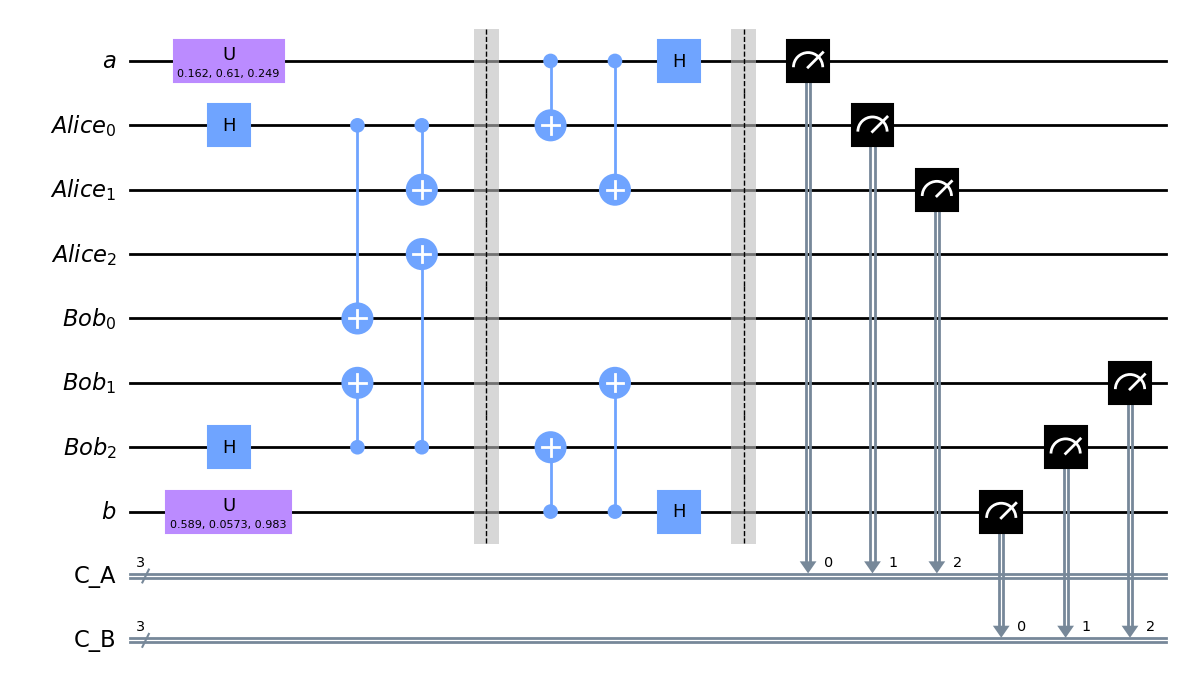

In [27]:
Alice = QuantumRegister(3, name="Alice")
Bob = QuantumRegister(3, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(3, name="C_A")
C_B = ClassicalRegister(3, name="C_B")

A1, A2, A3 = Alice
B1, B2, B3 = Bob

CUM3 = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a = rd.random()
beta_a = rd.random()
gamma_a = rd.random()

CUM3.u(alpha_a, beta_a, gamma_a, a)

alpha_b = rd.random()
beta_b = rd.random()
gamma_b = rd.random()

CUM3.u(alpha_b, beta_b, gamma_b, b)

CUM3.h(A1)
CUM3.cx(A1, B1)
CUM3.cx(A1, A2)

CUM3.h(B3)
CUM3.cx(B3, B2)
CUM3.cx(B3, A3)

CUM3.barrier(range(8))

CUM3.cx(a, A1)
CUM3.cx(a, A2)
CUM3.h(a)

CUM3.cx(b, B3)
CUM3.cx(b, B2)
CUM3.h(b)

CUM3.barrier(range(8))

CUM3.measure(a, C_A[0])
CUM3.measure(A1, C_A[1])
CUM3.measure(A2, C_A[2])

CUM3.measure(b, C_B[0])
CUM3.measure(B3, C_B[1])
CUM3.measure(B2, C_B[2])

CUM3.draw('mpl', idle_wires=False)

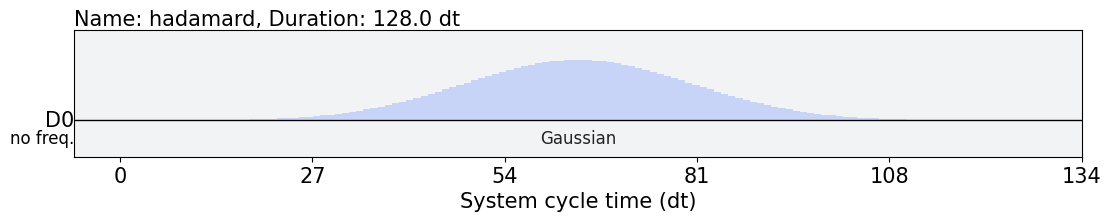

In [28]:
from qiskit import pulse
from qiskit.pulse.library import Gaussian
from qiskit.providers.fake_provider import FakeValencia

backend = FakeValencia()

with pulse.build(backend, name='hadamard') as h_q0:
    pulse.play(Gaussian(duration=128, amp=0.1, sigma=16), pulse.drive_channel(0))
    
h_q0.draw()



In [32]:
CUM3.add_calibration('h', [0], h_q0)
CUM3.add_calibration('cx', [1], h_q0)

['id', 'rz', 'sx', 'x', 'cx', 'reset']


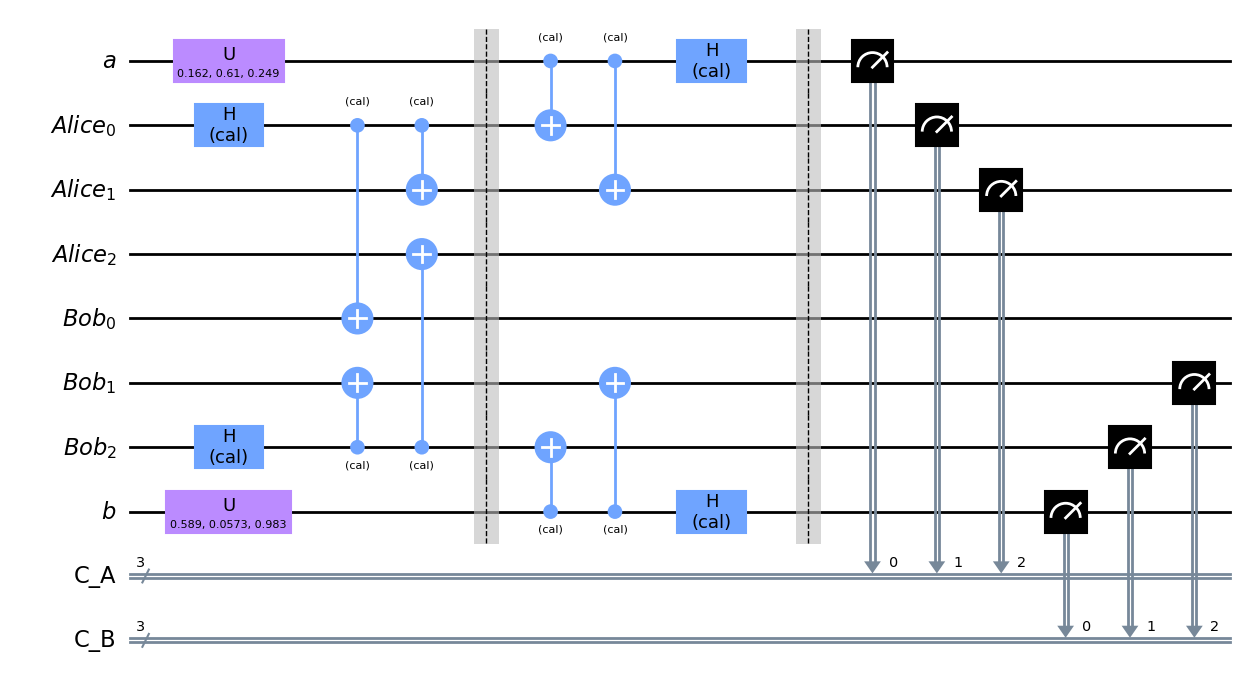

In [33]:
from qiskit import transpile
from qiskit.providers.fake_provider import FakeHanoi

backend = FakeHanoi()

print(backend.configuration().basis_gates)
CUM3.draw('mpl', idle_wires=False)

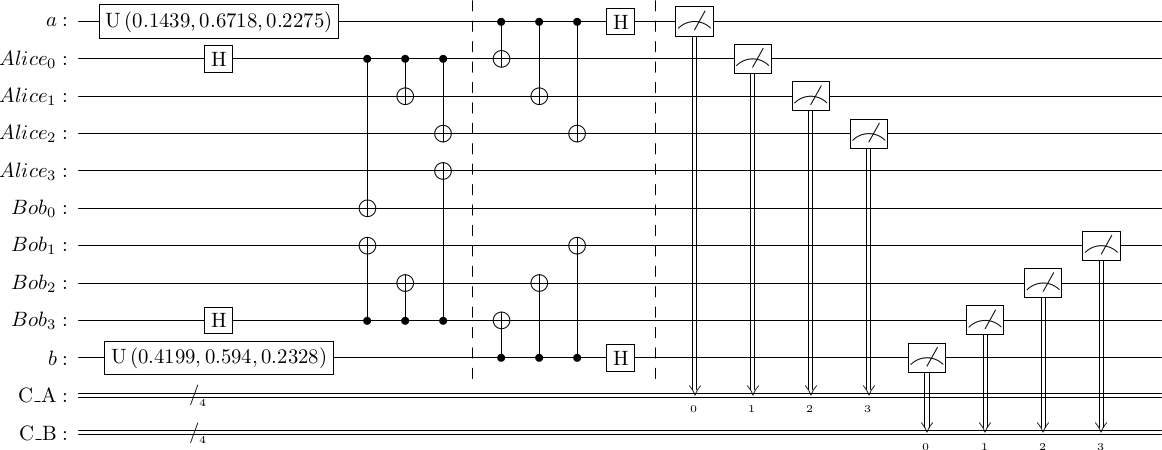

In [3]:
#four-qubit
Alice = QuantumRegister(4, name="Alice")
Bob = QuantumRegister(4, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(4, name="C_A")
C_B = ClassicalRegister(4, name="C_B")

A1, A2, A3, A4 = Alice
B1, B2, B3, B4 = Bob

CUM4 = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a = rd.random()
beta_a = rd.random()
gamma_a = rd.random()

CUM4.u(alpha_a, beta_a, gamma_a, a)

alpha_b = rd.random()
beta_b = rd.random()
gamma_b = rd.random()

CUM4.u(alpha_b, beta_b, gamma_b, b)

CUM4.h(A1)
CUM4.cx(A1, B1)
CUM4.cx(A1, A2)
CUM4.cx(A1, A3)

CUM4.h(B4)
CUM4.cx(B4, B2)
CUM4.cx(B4, B3)
CUM4.cx(B4, A4)

CUM4.barrier(range(10))

CUM4.cx(a, A1)
CUM4.cx(a, A2)
CUM4.cx(a, A3)
CUM4.h(a)

CUM4.cx(b, B4)
CUM4.cx(b, B3)
CUM4.cx(b, B2)
CUM4.h(b)

CUM4.barrier(range(10))

CUM4.measure(a, C_A[0])
CUM4.measure(A1, C_A[1])
CUM4.measure(A2, C_A[2])
CUM4.measure(A3, C_A[3])

CUM4.measure(b, C_B[0])
CUM4.measure(B4, C_B[1])
CUM4.measure(B3, C_B[2])
CUM4.measure(B2, C_B[3])

CUM4.draw("latex")

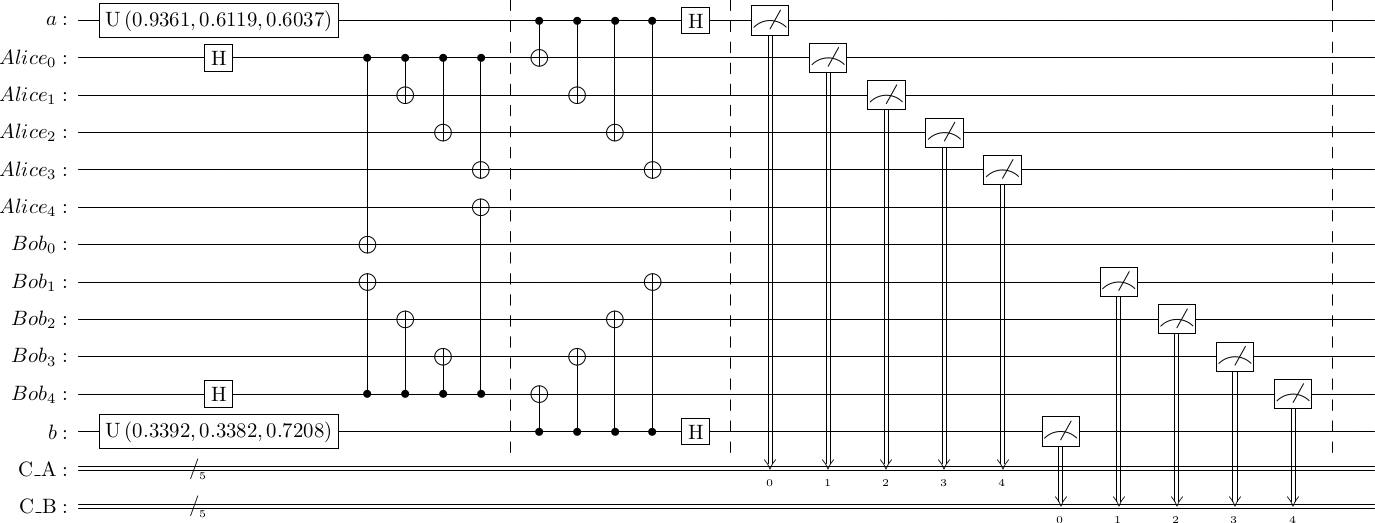

In [4]:
Alice = QuantumRegister(5, name="Alice")
Bob = QuantumRegister(5, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(5, name="C_A")
C_B = ClassicalRegister(5, name="C_B")

A1, A2, A3, A4, A5 = Alice
B1, B2, B3, B4, B5 = Bob

CUM5 = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a1 = rd.random()
beta_a1 = rd.random()
gamma_a1 = rd.random()

CUM5.u(alpha_a1, beta_a1, gamma_a1, a)

alpha_b1 = rd.random()
beta_b1 = rd.random()
gamma_b1 = rd.random()

CUM5.u(alpha_b1, beta_b1, gamma_b1, b)

CUM5.h(A1)
CUM5.cx(A1, B1)
CUM5.cx(A1, A2)
CUM5.cx(A1, A3)
CUM5.cx(A1, A4)

CUM5.h(B5)
CUM5.cx(B5, B2)
CUM5.cx(B5, B3)
CUM5.cx(B5, B4)
CUM5.cx(B5, A5)

CUM5.barrier(range(12))

CUM5.cx(a, A1)
CUM5.cx(a, A2)
CUM5.cx(a, A3)
CUM5.cx(a, A4)
CUM5.h(a)

CUM5.cx(b, B5)
CUM5.cx(b, B4)
CUM5.cx(b, B3)
CUM5.cx(b, B2)
CUM5.h(b)


CUM5.barrier(range(12))

CUM5.measure(a, C_A[0])
CUM5.measure(A1, C_A[1])
CUM5.measure(A2, C_A[2])
CUM5.measure(A3, C_A[3])
CUM5.measure(A4, C_A[4])

CUM5.measure(b, C_B[0])
CUM5.measure(B2, C_B[1])
CUM5.measure(B3, C_B[2])
CUM5.measure(B4, C_B[3])
CUM5.measure(B5, C_B[4])

CUM5.barrier(range(12))

CUM5.draw("latex")

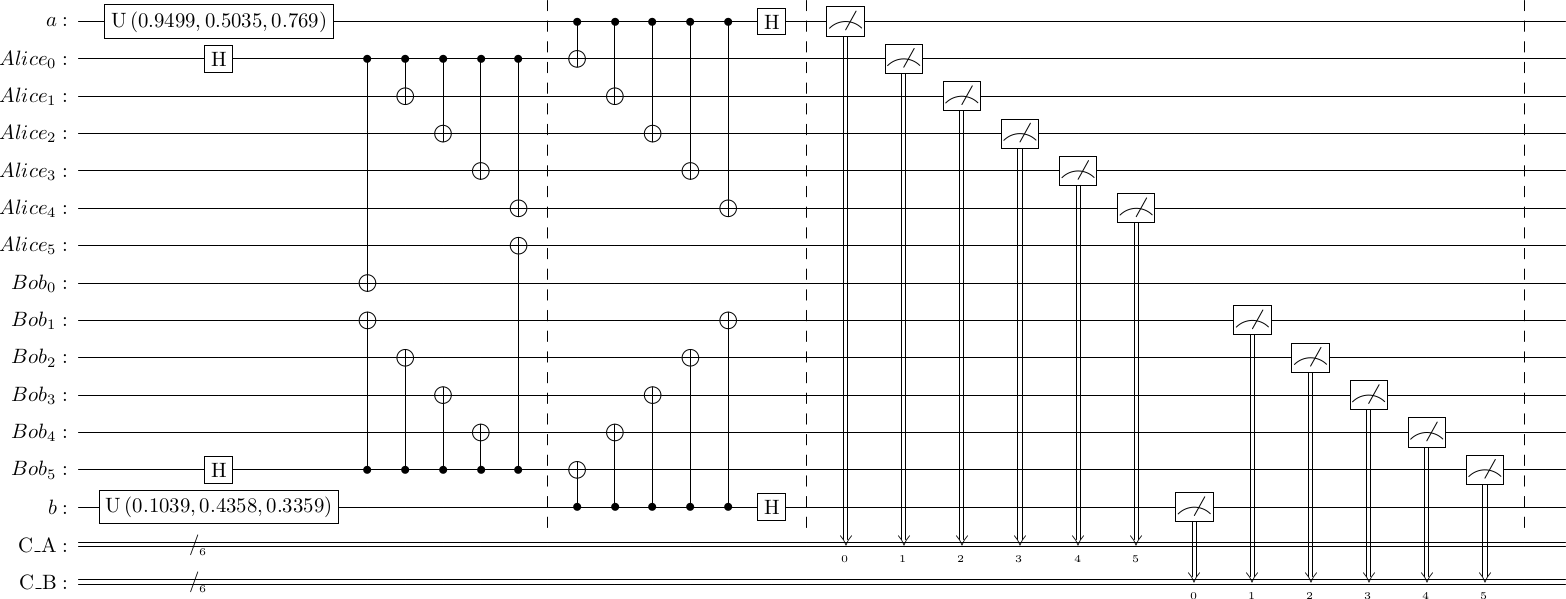

In [6]:
Alice = QuantumRegister(6, name="Alice")
Bob = QuantumRegister(6, name="Bob")
a = QuantumRegister(1, name="a")
b = QuantumRegister(1, name="b")
C_A = ClassicalRegister(6, name="C_A")
C_B = ClassicalRegister(6, name="C_B")

A1, A2, A3, A4, A5, A6 = Alice
B1, B2, B3, B4, B5, B6 = Bob

CUM5 = QuantumCircuit(C_A, a, Alice, Bob, b, C_B)

alpha_a1 = rd.random()
beta_a1 = rd.random()
gamma_a1 = rd.random()

CUM5.u(alpha_a1, beta_a1, gamma_a1, a)

alpha_b1 = rd.random()
beta_b1 = rd.random()
gamma_b1 = rd.random()

CUM5.u(alpha_b1, beta_b1, gamma_b1, b)

CUM5.h(A1)
CUM5.cx(A1, B1)
CUM5.cx(A1, A2)
CUM5.cx(A1, A3)
CUM5.cx(A1, A4)
CUM5.cx(A1, A5)

CUM5.h(B6)
CUM5.cx(B6, B2)
CUM5.cx(B6, B3)
CUM5.cx(B6, B4)
CUM5.cx(B6, B5)
CUM5.cx(B6, A6)

CUM5.barrier(range(14))

CUM5.cx(a, A1)
CUM5.cx(a, A2)
CUM5.cx(a, A3)
CUM5.cx(a, A4)
CUM5.cx(a, A5)
CUM5.h(a)

CUM5.cx(b, B6)
CUM5.cx(b, B5)
CUM5.cx(b, B4)
CUM5.cx(b, B3)
CUM5.cx(b, B2)
CUM5.h(b)


CUM5.barrier(range(14))

CUM5.measure(a, C_A[0])
CUM5.measure(A1, C_A[1])
CUM5.measure(A2, C_A[2])
CUM5.measure(A3, C_A[3])
CUM5.measure(A4, C_A[4])
CUM5.measure(A5, C_A[5])

CUM5.measure(b, C_B[0])
CUM5.measure(B2, C_B[1])
CUM5.measure(B3, C_B[2])
CUM5.measure(B4, C_B[3])
CUM5.measure(B5, C_B[4])
CUM5.measure(B6, C_B[5])

CUM5.barrier(range(14))

CUM5.draw("latex")

In [34]:
def get_noise(p):

    error_meas = pauli_error([('X',p), ('I', 1 - p)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
        
    return noise_model
noise_model = get_noise(0.01)
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(CUM4, aer_sim)
qobj = assemble(t_qc)
counts = aer_sim.run(qobj, noise_model=noise_model, shots=16384).result().get_counts()

dataArray = np.zeros((16,16))

dict_keys = counts.keys()
for i in dict_keys:
    dataArray[int(i[3])*8+int(i[2])*4+int(i[1])*2+int(i[0])][int(i[8])*8+int(i[7])*4+int(i[6])*2+int(i[5])] += counts.get(i)
    # print(i, job_run_on_backend.result().get_counts().get(i))
    
    
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(threshold=sys.maxsize)   

probaArray = dataArray/counts.shots()

import scipy.linalg as la

Minv = la.inv(probaArray)
print(Minv)



NameError: name 'CUM4' is not defined